In [2]:
import numpy as np
import pandas as pd
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  dulithaharasara


Your Kaggle Key:

  ········


100%|██████████████████████████████████████████████████████████████████████████████| 3.97k/3.97k [00:00<00:00, 581kB/s]

In [4]:
data = pd.read_csv("heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [7]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
(data["DEATH_EVENT"] == 1).sum()

96

In [10]:
(data["DEATH_EVENT"] == 0).sum()

203

In [11]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2d518b19490>,
 [Text(0.586283462171652, 0.9307371820143544, '1'),
  Text(-0.5862835493135531, -0.9307371271225311, '0')],
 [Text(0.31979097936635553, 0.5076748265532841, '32.1%'),
  Text(-0.3197910268983017, -0.5076747966122896, '67.9%')])

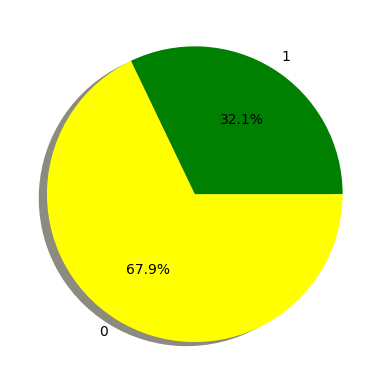

In [12]:
labels = '1', '0'
sizes = [(data["DEATH_EVENT"] == 1).sum(),(data["DEATH_EVENT"] == 0).sum()]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',colors=["green","yellow"],shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})

In [13]:
x = data.iloc[:,0:-1]

In [14]:
y = data.iloc[:,-1]

In [15]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [18]:
x_train.shape

(239, 12)

In [19]:
y_train.shape

(239,)

In [20]:
x_test.shape

(60, 12)

In [21]:
y_test.shape

(60,)

In [22]:
y_train.value_counts()

DEATH_EVENT
0    162
1     77
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2d52a659e50>,
 [Text(-0.5830474037752073, 0.9327677765397938, '0'),
  Text(0.5830474037752075, -0.9327677765397937, '1')],
 [Text(-0.31802585660465843, 0.5087824235671602, '67.8%'),
  Text(0.3180258566046586, -0.5087824235671601, '32.2%')])

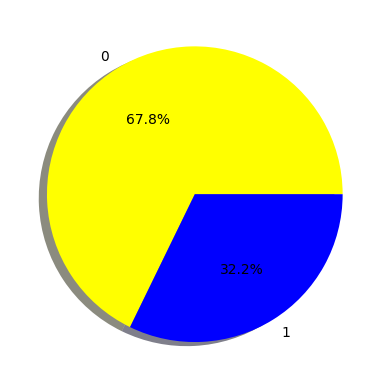

In [23]:
labels = '0', '1'
sizes = [y_train.value_counts()[0],y_train.value_counts()[1]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',colors=["yellow","blue"],shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)
print(x_train_smote.shape,y_train_smote.shape)

ModuleNotFoundError: No module named 'imblearn'

In [108]:
y_train_smote.value_counts()

DEATH_EVENT
0    156
1    156
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1e0d87115b0>,
 [Text(6.735557395310444e-17, 1.1, '0'),
  Text(-2.0206672185931328e-16, -1.1, '1')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

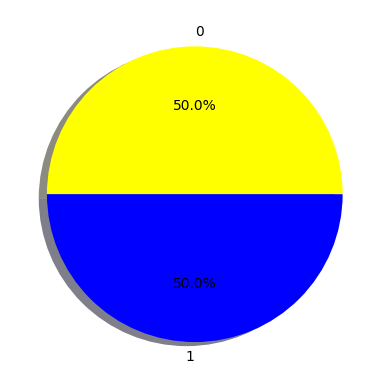

In [109]:
labels = '0', '1'
sizes = [y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',colors=["yellow","blue"],shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9})

In [115]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

In [116]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [117]:
classifier.score(x_test,y_test)

0.9

In [118]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[43,  4],
       [ 2, 11]], dtype=int64)

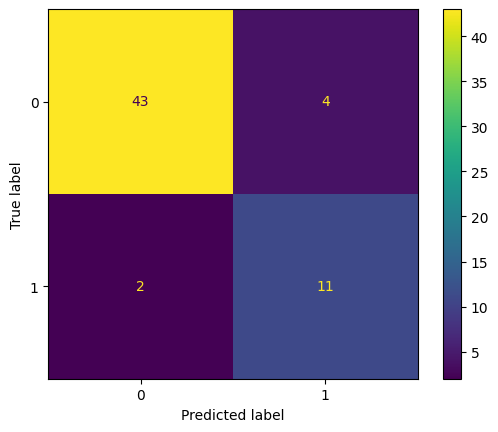

In [119]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=classifier.classes_)
disp.plot()